## 傅里叶分析和变换
说到这傅里叶分析傅里叶变化理工科学生应该多少都知道，这里简单复习下，严谨的概念公式可以看课本和相关文献。这里就简单过下。
### 时频分析
我们看到的世界可以分为频域和时域，从时间角度看很多事物是不断随时间变化的，比如股票的涨跌，人的身高的变化，我们可以看成无限变化的曲线。 就是时域。  
而对于周期变化的曲线，或者说我们看所有的身高变化，其实都可以看作一定范围内的频率数据变化，身高符合正态分布，这就是频域。 
### 傅里叶变换
而数字信号领地最重要的基础就是傅里叶变换，它可分析信号的成分，也可用这些成分合成信号。许多波形可作为信号的成分，比如正弦波、方波、锯齿波等，傅里叶变换用正弦波作为信号的成分。除此之外，傅里叶变换在物理学、数论、组合数学、信号处理、概率、统计、密码学、声学、光学等领域都有着广泛的应用。  
简单的讲我们在中学和大学很多见的就是搞一堆正弦余弦函数，那么这里就可以看出，如果工课相关比如物理信息的童鞋经过一些实验和应用，就会更多理解这些，而再回头看这些又会温故知新，对于其它人就相当就是背了一堆概念公式。  
而傅里叶变化就是说各种连续的变化信号，比如声音、心电图就是可以分解为三角函数的叠加，比如正弦函数的线性组合。   
那为何这是和改变世界的一大突破，首先从数学理论上，这些正弦都是无限可导可微的，可以很好的进行各种理论建模分析；另一方面，这些函数也可以很好地数值计算，并可以进行各种工程化算法实现，物理的模拟叠加等等。  
傅里叶变换就是比时域分析转为了频域分析。
![image.png](images/fly.jpeg)  

当然具体的工程实现还有很多算法，比如快速傅里叶变换，离散傅里叶变换DFT等，真正能工程应用还是要踏踏实实弄清楚公式和概念，不断实践，学习没有捷径。  
傅里叶变换可以将时域信号转化为频域信号。在频域里，可以对信号使用比时域更简单的运算，比如滤波，比如数字信号处理中常用的离散傅里叶变换DFT，将时域信号的频率信息提取出来再进行分析处理。但是对于在时域中有明显位置信息的信号波形（频域特征随时间有变化），采用傅里叶变换并不能识别时域的位置信息，造成提取后的特征信息丢失。所以主角出场了，就是小波分析。  
### reference
https://www.cnblogs.com/h2zZhou/p/8405717.html  
https://baijiahao.baidu.com/s?id=1636833728798493906&wfr=spider&for=pc  

## 小波变换（wavelet transform）
小波分析就是另一种时域信号转换为频域信号提取特征的方法。顾名思义小波就是很小的波，它具体推导可以见相关参考书。  
小波的积分近似为0，可以进行变换小尺度的频域分析，简单讲就是将已有的波分解为很多个可以小的波形，小波按照形状种类分为六种。  
比如一阶导数是表示是在段阶段内是否增加或减少，而二阶导数就是更长的趋势分析，如股票分析更想看二阶导数，就是预期的差值，而不是短时间的增减，这就类似ARIMA里的平滑方式，在更低的频域或是更长时域内分析数据的变化，而小波也是类似的多尺度分析的方法。 
和傅里叶变换这些重要的共同过程就是分解和重构，类似log平稳后再用指数函数exp回归原始值域。  
但是小波的原理和傅里叶变换又不同，快速傅里叶变换是比较直观和naive的想法给信号加窗，分段做傅里叶；而小波直接改变了基函数——将无限长的三角函数基换成了有限长的会衰减的小波基。这样不仅能够获取频率，还可以定位到时间了。

### 参考
https://www.cnblogs.com/jfdwd/p/9249850.html  
https://blog.csdn.net/jbb0523/article/details/42586749   
https://blog.csdn.net/yuuyuhaksho/article/details/87537967  
https://blog.csdn.net/nanbei2463776506/article/details/64124841



2020-04-11 00:00:28    1.0
2020-04-11 00:01:28    2.0
2020-04-11 00:02:28    2.0
2020-04-11 00:03:02    1.0
2020-04-11 00:04:02    2.0
dtype: float64
         timestamp  value
20   1586534428000    1.0
350  1586534727000   12.0
351  1586534642000    2.0
352  1586534582000    1.0
353  1586534548000    2.0


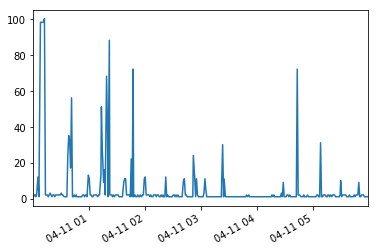

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules,fpgrowth
import networkx as nx
import csv
#from rootcause.association_analysis import alarm_association
from preutils import  timeseries_processor
import warnings
warnings.filterwarnings('ignore')  #忽略警告

 
if __name__=='__main__':
    
    pd.set_option('display.width', 1000)
    homePath = os.path.dirname(os.path.abspath('__file__'))
    # Windows下的存储路径与Linux并不相同
#data//20200411/platform/db_oracle_11g.csv

    if os.name == "nt":
        dataPath = "%s\\data\20200411\platform\dcos_docker.csv" % homePath
    else:
        dataPath = "%s/data/20200411/platform/dcos_docker.csv" % homePath
     
    itemid = 999999996381403
    cmdbid = 'docker_003'
    indexname = 'container_cpu_used'
    bomcid = 'ZJ-004-059'
    
    docker=pd.read_csv(dataPath)
    #docker.head()
    dockergrouped = docker.groupby(['itemid','name','bomc_id'])
    #for item in dockergrouped.itemid:
    alarmtime = [1586534700000]
    dtdata  = docker[  (docker['itemid']==itemid) & (docker['cmdb_id']==cmdbid) & (docker['name']==indexname)][['timestamp','value']]
    #timeseries = dtdata['value'].values
    #dockertime1 = docker.loc[(docker['timestamp'] <= alarmtime)&(docker['timestamp']>alarmtime- 300000)]
    #timeseries_set =  dockertime1['value'].values
    #print(dts.shape)
            
    dts = timeseries_processor.get_tsdata(dataPath,itemid,bomcid,indexname )
    print(dts.head())
    print(dtdata.head())
    dts.plot()
    

In [2]:
import pywt

# 小波滤噪
def wavelet_denoising(data):
    # 小波函数取db4
    db4 = pywt.Wavelet('db4')
    
    # 分解
    coeffs = pywt.wavedec(data, db4)
    # 高频系数置零
    coeffs[len(coeffs)-1] *= 0
    coeffs[len(coeffs)-2] *= 0
    # 重构
    meta = pywt.waverec(coeffs, db4)
    metas = pd.Series(meta)
    return metas

In [3]:
#小波族群和基函数
import pywt  
print(pywt.families())  #打印出小波族
# ['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus', 'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor']
 
for family in pywt.families():  #打印出每个小波族的每个小波函数
    print('%s family: '%(family) + ','.join(pywt.wavelist(family))) 

['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus', 'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor']
haar family: haar
db family: db1,db2,db3,db4,db5,db6,db7,db8,db9,db10,db11,db12,db13,db14,db15,db16,db17,db18,db19,db20,db21,db22,db23,db24,db25,db26,db27,db28,db29,db30,db31,db32,db33,db34,db35,db36,db37,db38
sym family: sym2,sym3,sym4,sym5,sym6,sym7,sym8,sym9,sym10,sym11,sym12,sym13,sym14,sym15,sym16,sym17,sym18,sym19,sym20
coif family: coif1,coif2,coif3,coif4,coif5,coif6,coif7,coif8,coif9,coif10,coif11,coif12,coif13,coif14,coif15,coif16,coif17
bior family: bior1.1,bior1.3,bior1.5,bior2.2,bior2.4,bior2.6,bior2.8,bior3.1,bior3.3,bior3.5,bior3.7,bior3.9,bior4.4,bior5.5,bior6.8
rbio family: rbio1.1,rbio1.3,rbio1.5,rbio2.2,rbio2.4,rbio2.6,rbio2.8,rbio3.1,rbio3.3,rbio3.5,rbio3.7,rbio3.9,rbio4.4,rbio5.5,rbio6.8
dmey family: dmey
gaus family: gaus1,gaus2,gaus3,gaus4,gaus5,gaus6,gaus7,gaus8
mexh family: mexh
morl family: morl
cgau family: cgau1,cgau2,cgau3,cgau4,cgau5,cgau6,cgau7,cga